In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('no_dup_data.csv')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.shape

(318592, 20)

In [4]:
df.head()

,X,Y,id,status,request_type_title,description,web_url,report_method,priority_code,created_at,acknowledged_at,closed_at,reopened_at,updated_at,days_to_close,canonical_issue_id,address,neighborhood,council_district,oid
0,NaN,NaN,10014644,Open,Abandoned Vehicle,Redacted,https://seeclickfix.com/issues/10014644,direct,2,2021/05/28 04:12:07+00,NaN,NaN,NaN,2021/05/28 04:12:07+00,NaN,NaN,Redacted,NaN,NaN,1
1,-83.039212,42.386152,10014457,Open,Street Light Out,street lights are dim / the yellow defective k...,https://seeclickfix.com/issues/10014457,direct,2,2021/05/28 03:35:08+00,NaN,NaN,NaN,2021/05/28 03:35:09+00,NaN,NaN,"5555 Conant St Detroit, MI 48211, USA",NaN,NaN,42
2,-83.058072,42.342364,10014199,Open,Potholes,Pothole,https://seeclickfix.com/issues/10014199,direct,2,2021/05/28 02:23:44+00,NaN,NaN,NaN,2021/05/28 02:23:52+00,NaN,NaN,"2906 Cass Ave Detroit MI 48201, United States",NaN,NaN,83
3,-83.204602,42.348446,10014182,Open,Vacant Lot Cutting,I asked needs to be cut is very long,https://seeclickfix.com/issues/10014182,direct,2,2021/05/28 02:13:42+00,NaN,NaN,NaN,2021/05/28 02:14:39+00,NaN,NaN,"7700 Mettetal St Detroit, MI, 48228, USA",NaN,NaN,124
4,-83.260260,42.412897,10014396,Acknowledged,Investigate Running Water Vacant Property,This request was submitted to the Detroit Wate...,https://seeclickfix.com/issues/10014396,direct,2,2021/05/28 02:13:39+00,2021/05/28 03:07:35+00,NaN,NaN,2021/05/28 03:07:35+00,NaN,NaN,22244 Grove St Detroit 48219,NaN,NaN,165


In [5]:
df.columns

Index(['X', 'Y', 'id', 'status', 'request_type_title', 'description',
       'web_url', 'report_method', 'priority_code', 'created_at',
       'acknowledged_at', 'closed_at', 'reopened_at', 'updated_at',
       'days_to_close', 'canonical_issue_id', 'address', 'neighborhood',
       'council_district', 'oid'],
      dtype='object')

In [6]:
df.rename({"request_type_title" : "issue_type", 
           "web_url" : "url"}, axis=1,inplace=True)

In [7]:
df.columns

Index(['X', 'Y', 'id', 'status', 'issue_type', 'description', 'url',
       'report_method', 'priority_code', 'created_at', 'acknowledged_at',
       'closed_at', 'reopened_at', 'updated_at', 'days_to_close',
       'canonical_issue_id', 'address', 'neighborhood', 'council_district',
       'oid'],
      dtype='object')

In [8]:
data = df[["issue_type", "created_at"]].copy()

In [9]:
data.head()

,issue_type,created_at
0,Abandoned Vehicle,2021/05/28 04:12:07+00
1,Street Light Out,2021/05/28 03:35:08+00
2,Potholes,2021/05/28 02:23:44+00
3,Vacant Lot Cutting,2021/05/28 02:13:42+00
4,Investigate Running Water Vacant Property,2021/05/28 02:13:39+00


In [10]:
create_year = []
freq = []
for row in range(318592):
    val = str(data.iloc[row,1])
    year = val[0:4]
    create_year.append(year)
    freq.append(1)

In [11]:
data["year_created"] = create_year
data.head()

,issue_type,created_at,year_created
0,Abandoned Vehicle,2021/05/28 04:12:07+00,2021
1,Street Light Out,2021/05/28 03:35:08+00,2021
2,Potholes,2021/05/28 02:23:44+00,2021
3,Vacant Lot Cutting,2021/05/28 02:13:42+00,2021
4,Investigate Running Water Vacant Property,2021/05/28 02:13:39+00,2021


In [12]:
issuetype_array = data["issue_type"].unique()
issuetype_array

array(['Abandoned Vehicle', 'Street Light Out', 'Potholes',
       'Vacant Lot Cutting', 'Investigate Running Water Vacant Property',
       'Illegal Dump Sites', 'Curbside Solid Waste Issue',
       'Reboard House Request', 'Park Issue', 'Tree Issue',
       'Traffic Sign Issue', 'Illegal Dumping In Progress',
       'Investigate Manhole Cover', 'Investigate Restoration',
       'Investigate Service Leak', 'Traffic Signal Issue',
       'Investigate Water Main Break', 'Investigate Cave In (Sink Hole)',
       'Rodent Extermination', 'DPW - Debris Removal - DPW USE ONLY',
       'Curbside - DPW ONLY', 'DPW - Other environmental - DPW USE ONLY',
       'Investigate Blocked Basin Street',
       'Investigate Blocked Basin Alley', 'Graffiti Abatement',
       'Other - Referred to other City Department',
       'Investigate Fire Hydrant Related Issues', 'Dead Animal Removal',
       'Street Light Pole Down', 'Traffic Complaints', 'Squatters Issue',
       'Other - Not within City jurisdict

In [13]:
data["year_created"].value_counts()

2020    63362
2019    59416
2018    51178
2017    48944
2016    41852
2021    28597
2015    23754
2014     1489
Name: year_created, dtype: int64

In [16]:
data15 = data[data["year_created"] == "2015"]
issue15 = data15["issue_type"].value_counts()

data16 = data[data["year_created"] == "2016"]
issue16 = data16["issue_type"].value_counts()

data17 = data[data["year_created"] == "2017"]
issue17 = data17["issue_type"].value_counts()

data18 = data[data["year_created"] == "2018"]
issue18 = data18["issue_type"].value_counts()

data19 = data[data["year_created"] == "2019"]
issue19 = data19["issue_type"].value_counts()

data20 = data[data["year_created"] == "2020"]
issue20 = data20["issue_type"].value_counts()

data21 = data[data["year_created"] == "2021"]
issue21 = data21["issue_type"].value_counts()

In [17]:
issue15

Illegal Dump Sites                           4312
Tree Issue                                   3536
Blocked Catch Basin                          2900
Potholes                                     2744
Running Water in a Home or Building          2002
Traffic Sign Issue                           1504
DPW - Other environmental - DPW USE ONLY     1000
Curbside Solid Waste Issue                    963
Water Main Break                              937
Abandoned Vehicle                             915
Fire Hydrant Issue                            784
DPW - Debris Removal - DPW USE ONLY           776
Manhole Cover Issue                           621
Traffic Signal Issue                          479
Street Light Pole Down                        232
Residential Snow Removal Issue                 32
Dead Animal Removal                            12
Other - Referred to other City Department       3
Graffiti Abatement                              2
Name: issue_type, dtype: int64

In [18]:
issue18.head()

DPW - Debris Removal - DPW USE ONLY         9315
Illegal Dump Sites                          7227
DPW - Other environmental - DPW USE ONLY    6931
Curbside Solid Waste Issue                  4681
Rodent Extermination - BSEED Only           4239
Name: issue_type, dtype: int64

In [19]:
issue20.head()

Curbside - DPW ONLY                    9527
Illegal Dump Sites                     7197
DPW - Debris Removal - DPW USE ONLY    6830
Abandoned Vehicle                      6789
Curbside Solid Waste Issue             6316
Name: issue_type, dtype: int64

In [20]:
issue15.tail()

Street Light Pole Down                       232
Residential Snow Removal Issue                32
Dead Animal Removal                           12
Other - Referred to other City Department      3
Graffiti Abatement                             2
Name: issue_type, dtype: int64

In [21]:
issue16.tail()

Street Light Pole Down                       151
Park Issue                                    16
Other - Referred to other City Department      4
Clogged Drain                                  1
Other - Not within scope of City services      1
Name: issue_type, dtype: int64

In [22]:
issue20.tail()

Other - Not within scope of City services          8
Squatters - Fraud Investigation                    8
Graffiti Abatement - Major Project                 4
Marina Issue                                       4
Investigate Water In Basement (Basement Backup)    1
Name: issue_type, dtype: int64

In [81]:
"issue_freq_data.plot(subplots=True, lw = 5, figsize = (10,20), style='.-')"
import seaborn as sns
sns.set()



In [70]:
years = [2015, 2016, 2017, 2018, 2019, 2020]
value15 = 0
if ("DPW - Other environmental - DPW USE ONLY" in issue15):
    value15 = issue15["DPW - Other environmental - DPW USE ONLY"]
value16 = 0
if ("DPW - Other environmental - DPW USE ONLY" in issue16):
    value16 = issue16["DPW - Other environmental - DPW USE ONLY"]
value17 = 0
if ("DPW - Other environmental - DPW USE ONLY" in issue17):
    value17 = issue17["DPW - Other environmental - DPW USE ONLY"]
value18 = 0
if ("DPW - Other environmental - DPW USE ONLY" in issue18):
    value18 = issue18["DPW - Other environmental - DPW USE ONLY"]
value19 = 0
if ("DPW - Other environmental - DPW USE ONLY" in issue19):
    value19 = issue19["DPW - Other environmental - DPW USE ONLY"]
value20 = 0
if ("DPW - Other environmental - DPW USE ONLY" in issue20):
    value20 = issue20["DPW - Other environmental - DPW USE ONLY"]

"""
value21 = 0
if ("DPW - Other environmental - DPW USE ONLY" in issue21):
    value21 = issue21["DPW - Other environmental - DPW USE ONLY"]"""
    
DPWenvironmental = [value15, value16, value17, value18, value19, value20]



[1000, 7095, 5929, 6931, 7421, 5060]

In [71]:
years = [2015, 2016, 2017, 2018, 2019, 2020]
value15 = 0
if ("DPW - Debris Removal - DPW USE ONLY" in issue15):
    value15 = issue15["DPW - Debris Removal - DPW USE ONLY"]
value16 = 0
if ("DPW - Debris Removal - DPW USE ONLY" in issue16):
    value16 = issue16["DPW - Debris Removal - DPW USE ONLY"]
value17 = 0
if ("DPW - Debris Removal - DPW USE ONLY" in issue17):
    value17 = issue17["DPW - Debris Removal - DPW USE ONLY"]
value18 = 0
if ("DPW - Debris Removal - DPW USE ONLY" in issue18):
    value18 = issue18["DPW - Debris Removal - DPW USE ONLY"]
value19 = 0
if ("DPW - Debris Removal - DPW USE ONLY" in issue19):
    value19 = issue19["DPW - Debris Removal - DPW USE ONLY"]
value20 = 0
if ("DPW - Debris Removal - DPW USE ONLY" in issue20):
    value20 = issue20["DPW - Debris Removal - DPW USE ONLY"]
"""value21 = 0
if ("DPW - Debris Removal - DPW USE ONLY" in issue21):
    value21 = issue21["DPW - Debris Removal - DPW USE ONLY"]"""
    
DPWdebris = [value15, value16, value17, value18, value19, value20]
DPWdebris

[776, 7049, 9314, 9315, 9545, 6830]

In [72]:
years = [2015, 2016, 2017, 2018, 2019, 2020]
value15 = 0
if ("Curbside - DPW ONLY" in issue15):
    value15 = issue15["Curbside - DPW ONLY"]
value16 = 0
if ("Curbside - DPW ONLY" in issue16):
    value16 = issue16["Curbside - DPW ONLY"]
value17 = 0
if ("Curbside - DPW ONLY" in issue17):
    value17 = issue17["Curbside - DPW ONLY"]
value18 = 0
if ("Curbside - DPW ONLY" in issue18):
    value18 = issue18["Curbside - DPW ONLY"]
value19 = 0
if ("Curbside - DPW ONLY" in issue19):
    value19 = issue19["Curbside - DPW ONLY"]
value20 = 0
if ("Curbside - DPW ONLY" in issue20):
    value20 = issue20["Curbside - DPW ONLY"]
"""value21 = 0
if ("Curbside - DPW ONLY" in issue21):
    value21 = issue21["Curbside - DPW ONLY"]"""
    
DPWcurb = [value15, value16, value17, value18, value19, value20]
DPWcurb

[0, 0, 0, 0, 450, 9527]

In [75]:
years = [2015, 2016, 2017, 2018, 2019, 2020]
value15 = 0
if ("Alley Grading - DPW Use Only" in issue15):
    value15 = issue15["Alley Grading - DPW Use Only"]
value16 = 0
if ("Alley Grading - DPW Use Only" in issue16):
    value16 = issue16["Alley Grading - DPW Use Only"]
value17 = 0
if ("Alley Grading - DPW Use Only" in issue17):
    value17 = issue17["Alley Grading - DPW Use Only"]
value18 = 0
if ("Alley Grading - DPW Use Only" in issue18):
    value18 = issue18["Alley Grading - DPW Use Only"]
value19 = 0
if ("Alley Grading - DPW Use Only" in issue19):
    value19 = issue19["Alley Grading - DPW Use Only"]
value20 = 0
if ("Alley Grading - DPW Use Only" in issue20):
    value20 = issue20["Alley Grading - DPW Use Only"]
value21 = 0
if ("Alley Grading - DPW Use Only" in issue21):
    value21 = issue21["Alley Grading - DPW Use Only"]
    
DPWalley = [value15, value16, value17, value18, value19, value20]
DPWalley

[0, 0, 0, 20, 43, 22]

In [76]:
DPWdata = {'DPWenvironmental':DPWenvironmental,
           'DPWdebris': DPWdebris,
           'DPWcurb': DPWcurb,
           'DPWalley': DPWalley
       }

issue_freq_data = pd.DataFrame(DPWdata, index = years)
issue_freq_data

,DPWenvironmental,DPWdebris,DPWcurb,DPWalley
2015,1000,776,0,0
2016,7095,7049,0,0
2017,5929,9314,0,0
2018,6931,9315,0,20
2019,7421,9545,450,43
2020,5060,6830,9527,22


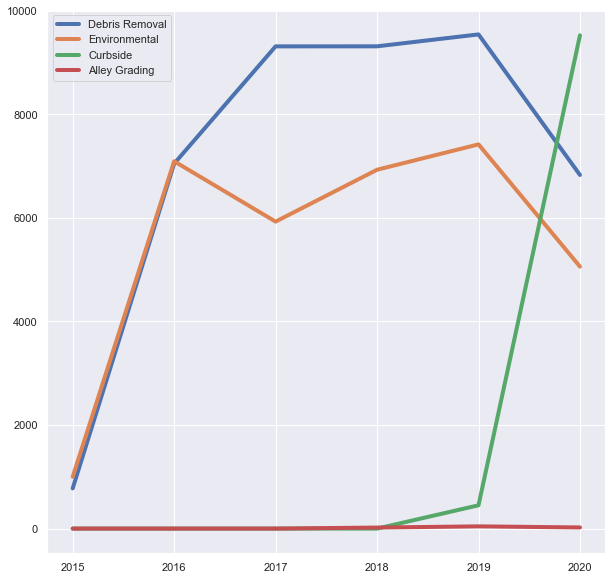

In [78]:
plt.figure(figsize=(10, 10))
sns.lineplot(data=issue_freq_data, x=years, y=DPWdebris, linewidth=4)
sns.lineplot(data=issue_freq_data, x=years, y=DPWenvironmental, linewidth=4)
sns.lineplot(data=issue_freq_data, x=years, y=DPWcurb, linewidth=4)
sns.lineplot(data=issue_freq_data, x=years, y=DPWalley, linewidth=4)
plt.legend(labels=["Debris Removal","Environmental", "Curbside", "Alley Grading"])

In [82]:
years = [2015, 2016, 2017, 2018, 2019, 2020]
value15 = 0
if ("Illegal Dump Sites" in issue15):
    value15 = issue15["Illegal Dump Sites"]
value16 = 0
if ("Illegal Dump Sites" in issue16):
    value16 = issue16["Illegal Dump Sites"]
value17 = 0
if ("Illegal Dump Sites" in issue17):
    value17 = issue17["Illegal Dump Sites"]
value18 = 0
if ("Illegal Dump Sites" in issue18):
    value18 = issue18["Illegal Dump Sites"]
value19 = 0
if ("Illegal Dump Sites" in issue19):
    value19 = issue19["Illegal Dump Sites"]
value20 = 0
if ("Illegal Dump Sites" in issue20):
    value20 = issue20["Illegal Dump Sites"]
"""value21 = 0
if ("Curbside - DPW ONLY" in issue21):
    value21 = issue21["Curbside - DPW ONLY"]"""
    
dumpsite = [value15, value16, value17, value18, value19, value20]
dumpsite

[4312, 4262, 5253, 7227, 7619, 7197]

In [83]:
years = [2015, 2016, 2017, 2018, 2019, 2020]
value15 = 0
if ("Abandoned Vehicle" in issue15):
    value15 = issue15["Abandoned Vehicle"]
value16 = 0
if ("Abandoned Vehicle" in issue16):
    value16 = issue16["Abandoned Vehicle"]
value17 = 0
if ("Abandoned Vehicle" in issue17):
    value17 = issue17["Abandoned Vehicle"]
value18 = 0
if ("Abandoned Vehicle" in issue18):
    value18 = issue18["Abandoned Vehicle"]
value19 = 0
if ("Abandoned Vehicle" in issue19):
    value19 = issue19["Abandoned Vehicle"]
value20 = 0
if ("Abandoned Vehicle" in issue20):
    value20 = issue20["Abandoned Vehicle"]
"""value21 = 0
if ("Curbside - DPW ONLY" in issue21):
    value21 = issue21["Curbside - DPW ONLY"]"""
    
abvehicle = [value15, value16, value17, value18, value19, value20]
abvehicle

[915, 2551, 3377, 3271, 5455, 6789]

In [84]:
years = [2015, 2016, 2017, 2018, 2019, 2020]
value15 = 0
if ("Curbside Solid Waste Issue" in issue15):
    value15 = issue15["Curbside Solid Waste Issue"]
value16 = 0
if ("Curbside Solid Waste Issue" in issue16):
    value16 = issue16["Curbside Solid Waste Issue"]
value17 = 0
if ("Curbside Solid Waste Issue" in issue17):
    value17 = issue17["Curbside Solid Waste Issue"]
value18 = 0
if ("Curbside Solid Waste Issue" in issue18):
    value18 = issue18["Curbside Solid Waste Issue"]
value19 = 0
if ("Curbside Solid Waste Issue" in issue19):
    value19 = issue19["Curbside Solid Waste Issue"]
value20 = 0
if ("Curbside Solid Waste Issue" in issue20):
    value20 = issue20["Curbside Solid Waste Issue"]
"""value21 = 0
if ("Curbside - DPW ONLY" in issue21):
    value21 = issue21["Curbside - DPW ONLY"]"""
    
curbwaste = [value15, value16, value17, value18, value19, value20]
curbwaste

[963, 5882, 5317, 4681, 7776, 6316]

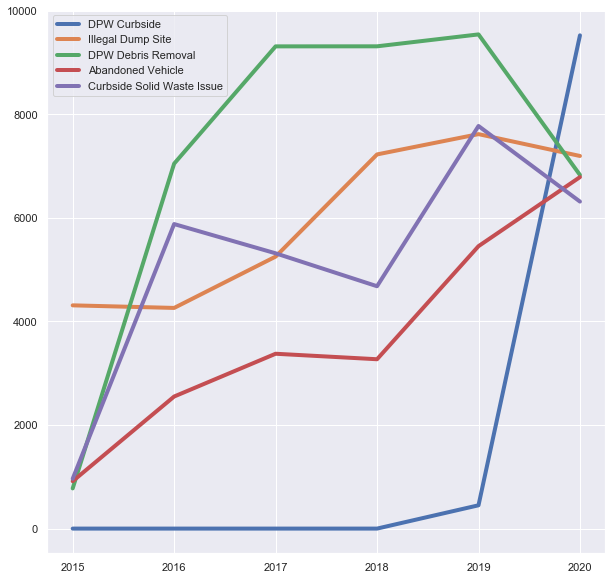

In [95]:
head20 = {'DPWdebris': DPWdebris,
           'DPWcurb': DPWcurb,
           'dumpsite': dumpsite,
           'abvehicle': abvehicle,
           'curbwaste': curbwaste
       }

issue_freq_data = pd.DataFrame(head20, index = years)

plt.figure(figsize=(10, 10))
sns.lineplot(data=issue_freq_data, x=years, y=DPWcurb, linewidth=4)
sns.lineplot(data=issue_freq_data, x=years, y=dumpsite, linewidth=4)
sns.lineplot(data=issue_freq_data, x=years, y=DPWdebris, linewidth=4)
sns.lineplot(data=issue_freq_data, x=years, y=abvehicle, linewidth=4)
sns.lineplot(data=issue_freq_data, x=years, y=curbwaste, linewidth=4)
plt.legend(labels=["DPW Curbside","Illegal Dump Site", "DPW Debris Removal", "Abandoned Vehicle", "Curbside Solid Waste Issue"])

In [94]:
issue20

Curbside - DPW ONLY                                           9527
Illegal Dump Sites                                            7197
DPW - Debris Removal - DPW USE ONLY                           6830
Abandoned Vehicle                                             6789
Curbside Solid Waste Issue                                    6316
DPW - Other environmental - DPW USE ONLY                      5060
Rodent Extermination                                          2632
Potholes                                                      2036
Investigate Water Main Break                                  1918
Investigate Blocked Basin Street                              1749
Traffic Sign Issue                                            1482
Tree Issue                                                    1462
Investigate Service Leak                                      1239
Investigate Fire Hydrant Related Issues                        999
Investigate Cave In (Sink Hole)                               

In [100]:
years = [2015, 2016, 2017, 2018, 2019, 2020]
value15 = 0
if ("Rodent Extermination" in issue15):
    value15 = issue15["Rodent Extermination"]
value16 = 0
if ("Rodent Extermination" in issue16):
    value16 = issue16["Rodent Extermination"]
value17 = 0
if ("Rodent Extermination" in issue17):
    value17 = issue17["Rodent Extermination"]
value18 = 0
if ("Rodent Extermination" in issue18):
    value18 = issue18["Rodent Extermination"]
value19 = 0
if ("Rodent Extermination" in issue19):
    value19 = issue19["Rodent Extermination"]
value20 = 0
if ("Rodent Extermination" in issue20):
    value20 = issue20["Rodent Extermination"]
"""value21 = 0
if ("Curbside - DPW ONLY" in issue21):
    value21 = issue21["Curbside - DPW ONLY"]"""
    
rodent = [value15, value16, value17, value18, value19, value20]
rodent

[0, 0, 2, 3, 2926, 2632]

In [103]:
years = [2015, 2016, 2017, 2018, 2019, 2020]
value15 = 0
if ("Potholes" in issue15):
    value15 = issue15["Potholes"]
value16 = 0
if ("Potholes" in issue16):
    value16 = issue16["Potholes"]
value17 = 0
if ("Potholes" in issue17):
    value17 = issue17["Potholes"]
value18 = 0
if ("Potholes" in issue18):
    value18 = issue18["Potholes"]
value19 = 0
if ("Potholes" in issue19):
    value19 = issue19["Potholes"]
value20 = 0
if ("Potholes" in issue20):
    value20 = issue20["Potholes"]
"""value21 = 0
if ("Curbside - DPW ONLY" in issue21):
    value21 = issue21["Curbside - DPW ONLY"]"""
    
potholes = [value15, value16, value17, value18, value19, value20]
potholes

[2744, 2666, 3188, 2935, 2275, 2036]

In [105]:
years = [2015, 2016, 2017, 2018, 2019, 2020]
value15 = 0
if ("Investigate Water Main Break" in issue15):
    value15 = issue15["Investigate Water Main Break"]
value16 = 0
if ("Investigate Water Main Break" in issue16):
    value16 = issue16["Investigate Water Main Break"]
value17 = 0
if ("Investigate Water Main Break" in issue17):
    value17 = issue17["Investigate Water Main Break"]
value18 = 0
if ("Investigate Water Main Break" in issue18):
    value18 = issue18["Investigate Water Main Break"]
value19 = 0
if ("Investigate Water Main Break" in issue19):
    value19 = issue19["Investigate Water Main Break"]
value20 = 0
if ("Investigate Water Main Break" in issue20):
    value20 = issue20["Investigate Water Main Break"]
"""value21 = 0
if ("Curbside - DPW ONLY" in issue21):
    value21 = issue21["Curbside - DPW ONLY"]"""
    
watermain = [value15, value16, value17, value18, value19, value20]
watermain

[0, 0, 0, 0, 1122, 1918]

In [109]:
years = [2015, 2016, 2017, 2018, 2019, 2020]
value15 = 0
if ("Investigate Blocked Basin Street" in issue15):
    value15 = issue15["Investigate Blocked Basin Street"]
value16 = 0
if ("Investigate Blocked Basin Street" in issue16):
    value16 = issue16["Investigate Blocked Basin Street"]
value17 = 0
if ("Investigate Blocked Basin Street" in issue17):
    value17 = issue17["Investigate Blocked Basin Street"]
value18 = 0
if ("Investigate Blocked Basin Street" in issue18):
    value18 = issue18["Investigate Blocked Basin Street"]
value19 = 0
if ("Investigate Blocked Basin Street" in issue19):
    value19 = issue19["Investigate Blocked Basin Street"]
value20 = 0
if ("Investigate Blocked Basin Street" in issue20):
    value20 = issue20["Investigate Blocked Basin Street"]
"""value21 = 0
if ("Curbside - DPW ONLY" in issue21):
    value21 = issue21["Curbside - DPW ONLY"]"""
    
blockbasin = [value15, value16, value17, value18, value19, value20]
blockbasin

[0, 0, 0, 0, 921, 1749]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa2656aadd0>,
      dtype=object)

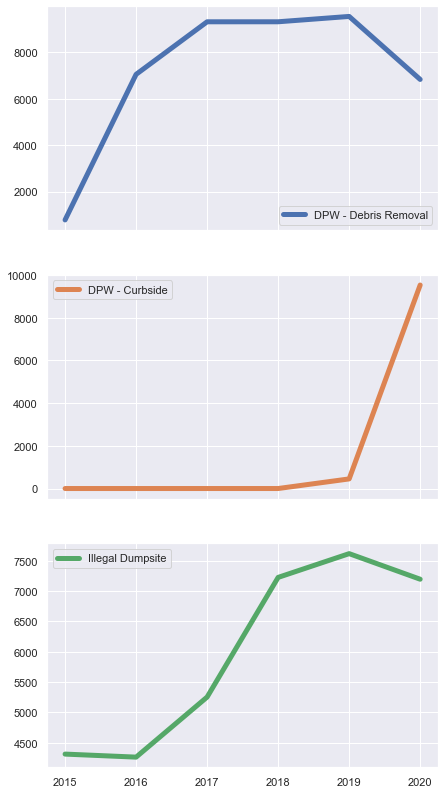

In [114]:
full_data = {'DPW - Debris Removal': DPWdebris,
           'DPW - Curbside': DPWcurb,
           'Illegal Dumpsite': dumpsite
       }

issue_freq_data = pd.DataFrame(full_data, index = years)
issue_freq_data.plot(subplots=True, lw = 5, figsize = (7,14))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa265c76810>,
      dtype=object)

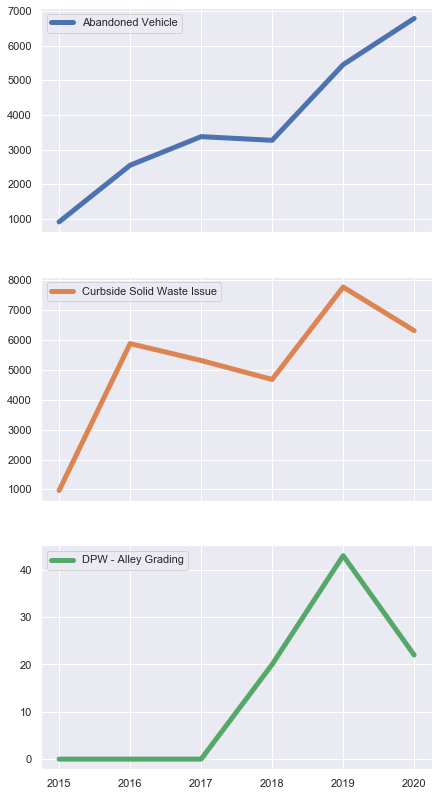

In [116]:
full_data2 = {'Abandoned Vehicle': abvehicle,
           'Curbside Solid Waste Issue': curbwaste,
             'DPW - Alley Grading': DPWalley
       }

issue_freq_data2 = pd.DataFrame(full_data2, index = years)
issue_freq_data2.plot(subplots=True, lw = 5, figsize = (7,14))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa26629b610>,
      dtype=object)

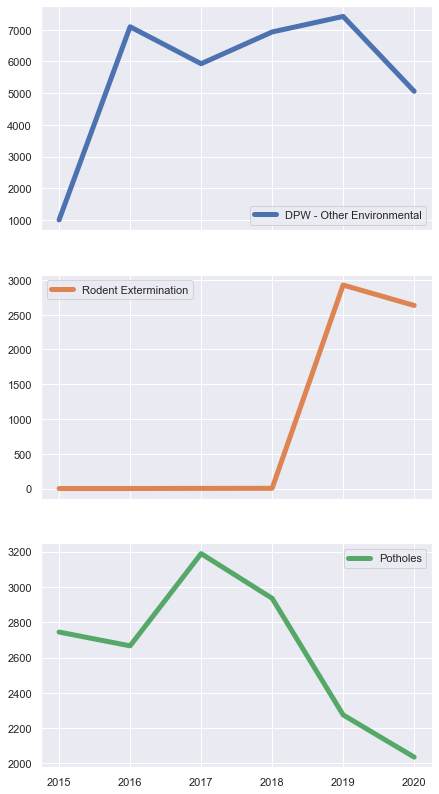

In [117]:
full_data3 = {'DPW - Other Environmental': DPWenvironmental,
             'Rodent Extermination': rodent,
             'Potholes': potholes,
       }

issue_freq_data3 = pd.DataFrame(full_data3, index = years)
issue_freq_data3.plot(subplots=True, lw = 5, figsize = (7,14))

In [122]:
years = [2015, 2016, 2017, 2018, 2019, 2020]
value15 = 0
if ("Graffiti Abatement" in issue15):
    value15 = issue15["Graffiti Abatement"]
value16 = 0
if ("Graffiti Abatement" in issue16):
    value16 = issue16["Graffiti Abatement"]
value17 = 0
if ("Graffiti Abatement" in issue17):
    value17 = issue17["Graffiti Abatement"]
value18 = 0
if ("Graffiti Abatement" in issue18):
    value18 = issue18["Graffiti Abatement"]
value19 = 0
if ("Graffiti Abatement" in issue19):
    value19 = issue19["Graffiti Abatement"]
value20 = 0
if ("Graffiti Abatement" in issue20):
    value20 = issue20["Graffiti Abatement"]
"""value21 = 0
if ("Curbside - DPW ONLY" in issue21):
    value21 = issue21["Curbside - DPW ONLY"]"""
    
graffiti = [value15, value16, value17, value18, value19, value20]
graffiti

[2, 0, 0, 0, 0, 82]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa26717ed90>,
      dtype=object)

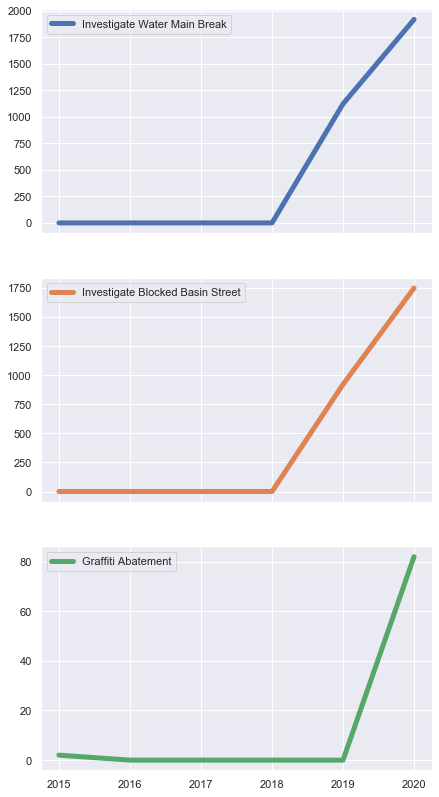

In [124]:
full_data4 = {
             'Investigate Water Main Break': watermain,
             'Investigate Blocked Basin Street': blockbasin,
             'Graffiti Abatement': graffiti
       }

issue_freq_data4 = pd.DataFrame(full_data4, index = years)
issue_freq_data4.plot(subplots=True, lw = 5, figsize = (7,14))

In [127]:
years = [2015, 2016, 2017, 2018, 2019, 2020]
value15 = 0
if ("Park Issue" in issue15):
    value15 = issue15["Park Issue"]
value16 = 0
if ("Park Issue" in issue16):
    value16 = issue16["Park Issue"]
value17 = 0
if ("Park Issue" in issue17):
    value17 = issue17["Park Issue"]
value18 = 0
if ("Park Issue" in issue18):
    value18 = issue18["Park Issue"]
value19 = 0
if ("Park Issue" in issue19):
    value19 = issue19["Park Issue"]
value20 = 0
if ("Park Issue" in issue20):
    value20 = issue20["Park Issue"]
"""value21 = 0
if ("Curbside - DPW ONLY" in issue21):
    value21 = issue21["Curbside - DPW ONLY"]"""
    
park = [value15, value16, value17, value18, value19, value20]

years = [2015, 2016, 2017, 2018, 2019, 2020]
value15 = 0
if ("Traffic Signal Issue" in issue15):
    value15 = issue15["Traffic Signal Issue"]
value16 = 0
if ("Traffic Signal Issue" in issue16):
    value16 = issue16["Traffic Signal Issue"]
value17 = 0
if ("Traffic Signal Issue" in issue17):
    value17 = issue17["Traffic Signal Issue"]
value18 = 0
if ("Traffic Signal Issue" in issue18):
    value18 = issue18["Traffic Signal Issue"]
value19 = 0
if ("Traffic Signal Issue" in issue19):
    value19 = issue19["Traffic Signal Issue"]
value20 = 0
if ("Traffic Signal Issue" in issue20):
    value20 = issue20["Traffic Signal Issue"]
"""value21 = 0
if ("Curbside - DPW ONLY" in issue21):
    value21 = issue21["Curbside - DPW ONLY"]"""
    
traffic = [value15, value16, value17, value18, value19, value20]

value15 = 0
if ("Tree Issue" in issue15):
    value15 = issue15["Tree Issue"]
value16 = 0
if ("Tree Issue" in issue16):
    value16 = issue16["Tree Issue"]
value17 = 0
if ("Tree Issue" in issue17):
    value17 = issue17["Tree Issue"]
value18 = 0
if ("Tree Issue" in issue18):
    value18 = issue18["Tree Issue"]
value19 = 0
if ("Tree Issue" in issue19):
    value19 = issue19["Tree Issue"]
value20 = 0
if ("Tree Issue" in issue20):
    value20 = issue20["Tree Issue"]
"""value21 = 0
if ("Curbside - DPW ONLY" in issue21):
    value21 = issue21["Curbside - DPW ONLY"]"""
    
tree = [value15, value16, value17, value18, value19, value20]


value15 = 0
if ("Street Light Out" in issue15):
    value15 = issue15["Street Light Out"]
value16 = 0
if ("Street Light Out" in issue16):
    value16 = issue16["Street Light Out"]
value17 = 0
if ("Street Light Out" in issue17):
    value17 = issue17["Street Light Out"]
value18 = 0
if ("Street Light Out" in issue18):
    value18 = issue18["Street Light Out"]
value19 = 0
if ("Street Light Out" in issue19):
    value19 = issue19["Street Light Out"]
value20 = 0
if ("Street Light Out" in issue20):
    value20 = issue20["Street Light Out"]
"""value21 = 0
if ("Curbside - DPW ONLY" in issue21):
    value21 = issue21["Curbside - DPW ONLY"]"""
    
streetlight = [value15, value16, value17, value18, value19, value20]

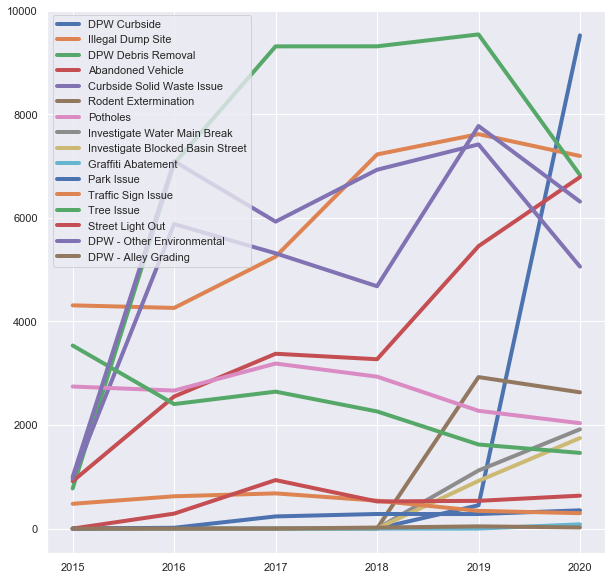

In [129]:
issue_freq_data = pd.DataFrame(head20, index = years)

plt.figure(figsize=(10, 10))
sns.lineplot(data=issue_freq_data, x=years, y=DPWcurb, linewidth=4)
sns.lineplot(data=issue_freq_data, x=years, y=dumpsite, linewidth=4)
sns.lineplot(data=issue_freq_data, x=years, y=DPWdebris, linewidth=4)
sns.lineplot(data=issue_freq_data, x=years, y=abvehicle, linewidth=4)

sns.lineplot(data=issue_freq_data, x=years, y=curbwaste, linewidth=4)
sns.lineplot(data=issue_freq_data, x=years, y=rodent, linewidth=4)
sns.lineplot(data=issue_freq_data, x=years, y=potholes, linewidth=4)
sns.lineplot(data=issue_freq_data, x=years, y=watermain, linewidth=4)

sns.lineplot(data=issue_freq_data, x=years, y=blockbasin, linewidth=4)
sns.lineplot(data=issue_freq_data, x=years, y=graffiti, linewidth=4)


sns.lineplot(data=issue_freq_data, x=years, y=park, linewidth=4)
sns.lineplot(data=issue_freq_data, x=years, y=traffic, linewidth=4)
sns.lineplot(data=issue_freq_data, x=years, y=tree, linewidth=4)
sns.lineplot(data=issue_freq_data, x=years, y=streetlight, linewidth=4)
sns.lineplot(data=issue_freq_data, x=years, y=DPWenvironmental, linewidth=4)
sns.lineplot(data=issue_freq_data, x=years, y=DPWalley, linewidth=4)

plt.legend(labels=["DPW Curbside","Illegal Dump Site", "DPW Debris Removal", 
                   "Abandoned Vehicle", "Curbside Solid Waste Issue","Rodent Extermination",
                   "Potholes", "Investigate Water Main Break", "Investigate Blocked Basin Street",
                   "Graffiti Abatement", "Park Issue", "Traffic Sign Issue", "Tree Issue", "Street Light Out",
                   "DPW - Other Environmental", "DPW - Alley Grading"
                  ])